In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_excel(r"C:\Users\giorg\Desktop\RISEN project\Articles\IMS articles\jupiter notebooks\dataset esplosivi grouped.xlsx", sheet_name='explosivesAl_DNT', index_col=0, header=0)
data.head()

,Class,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,...,13.68,13.7,13.72,13.74,13.76,13.78,13.8,13.82,13.84,13.86
Sample_id,,,,,,,,,,,,,,,,,,,,,
C4_7,RDX_based,0.004,0.006,0.002,0.006,-0.013,-0.005,-0.001,0.001,-0.002,...,-0.002,0.000,0.009,0.008,0.007,0.006,0.003,0.002,-0.002,-0.035
C4_8,RDX_based,-0.002,-0.016,-0.017,0.001,-0.012,-0.009,-0.007,-0.002,0.004,...,-0.008,0.003,0.000,-0.018,-0.006,0.001,-0.008,-0.013,-0.011,-0.035
C4_9,RDX_based,-0.001,0.002,0.002,0.002,0.002,0.003,-0.003,-0.001,-0.002,...,-0.004,0.000,0.000,0.002,-0.004,0.005,0.001,-0.004,-0.004,-0.035
C4_10,RDX_based,-0.011,0.000,-0.005,0.002,-0.025,-0.005,-0.010,-0.011,0.003,...,-0.011,-0.006,-0.015,-0.007,-0.021,-0.012,-0.008,-0.003,-0.015,-0.044
C4_11,RDX_based,-0.007,-0.009,-0.016,-0.008,-0.005,-0.009,-0.009,0.004,-0.007,...,0.011,-0.002,-0.023,-0.011,0.013,-0.023,0.019,-0.024,-0.010,-0.035


In [54]:
# Checking the presence missing values
data.isnull().sum()

Class    0
0.52     0
0.54     0
0.56     0
0.58     0
        ..
13.78    0
13.8     0
13.82    0
13.84    0
13.86    0
Length: 669, dtype: int64

In [55]:
# It is necessary to convert the column names as string to select them
data.columns = data.columns.astype(str) # to make the colnames as text

In [56]:
# Prepare the driftimes vector
wl = np.arange(0.52,13.87,0.02) #wavelengths
wl

array([ 0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,
        0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,
        0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,  1.02,  1.04,
        1.06,  1.08,  1.1 ,  1.12,  1.14,  1.16,  1.18,  1.2 ,  1.22,
        1.24,  1.26,  1.28,  1.3 ,  1.32,  1.34,  1.36,  1.38,  1.4 ,
        1.42,  1.44,  1.46,  1.48,  1.5 ,  1.52,  1.54,  1.56,  1.58,
        1.6 ,  1.62,  1.64,  1.66,  1.68,  1.7 ,  1.72,  1.74,  1.76,
        1.78,  1.8 ,  1.82,  1.84,  1.86,  1.88,  1.9 ,  1.92,  1.94,
        1.96,  1.98,  2.  ,  2.02,  2.04,  2.06,  2.08,  2.1 ,  2.12,
        2.14,  2.16,  2.18,  2.2 ,  2.22,  2.24,  2.26,  2.28,  2.3 ,
        2.32,  2.34,  2.36,  2.38,  2.4 ,  2.42,  2.44,  2.46,  2.48,
        2.5 ,  2.52,  2.54,  2.56,  2.58,  2.6 ,  2.62,  2.64,  2.66,
        2.68,  2.7 ,  2.72,  2.74,  2.76,  2.78,  2.8 ,  2.82,  2.84,
        2.86,  2.88,  2.9 ,  2.92,  2.94,  2.96,  2.98,  3.  ,  3.02,
        3.04,  3.06,

In [57]:
# select only numerical attributes
X = data.iloc[:, 1:]
X

,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,...,13.68,13.7,13.72,13.74,13.76,13.78,13.8,13.82,13.84,13.86
Sample_id,,,,,,,,,,,,,,,,,,,,,
C4_7,0.004,0.006,0.002,0.006,-0.013,-0.005,-0.001,0.001,-0.002,0.002,...,-0.002,0.000,0.009,0.008,0.007,0.006,0.003,0.002,-0.002,-0.035
C4_8,-0.002,-0.016,-0.017,0.001,-0.012,-0.009,-0.007,-0.002,0.004,-0.019,...,-0.008,0.003,0.000,-0.018,-0.006,0.001,-0.008,-0.013,-0.011,-0.035
C4_9,-0.001,0.002,0.002,0.002,0.002,0.003,-0.003,-0.001,-0.002,-0.001,...,-0.004,0.000,0.000,0.002,-0.004,0.005,0.001,-0.004,-0.004,-0.035
C4_10,-0.011,0.000,-0.005,0.002,-0.025,-0.005,-0.010,-0.011,0.003,-0.015,...,-0.011,-0.006,-0.015,-0.007,-0.021,-0.012,-0.008,-0.003,-0.015,-0.044
C4_11,-0.007,-0.009,-0.016,-0.008,-0.005,-0.009,-0.009,0.004,-0.007,-0.011,...,0.011,-0.002,-0.023,-0.011,0.013,-0.023,0.019,-0.024,-0.010,-0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,4DNT_8",-0.013,-0.001,-0.011,0.005,-0.013,-0.011,-0.007,0.000,-0.013,-0.010,...,-0.009,-0.003,-0.008,0.005,-0.023,-0.001,-0.016,-0.011,-0.009,-0.035
"3,4DNT_9",-0.007,-0.019,0.005,0.007,-0.008,-0.002,-0.007,-0.003,-0.002,-0.008,...,-0.011,-0.009,0.004,0.004,-0.015,-0.014,0.001,-0.015,-0.018,-0.035
"3,4DNT_10",-0.033,-0.001,-0.026,0.005,-0.027,-0.004,-0.016,-0.010,-0.012,-0.008,...,-0.029,-0.012,-0.002,-0.011,-0.018,-0.003,-0.022,-0.008,-0.005,-0.035


In [58]:
Y = data.loc[:,'Class']
Y

Sample_id
C4_7         RDX_based
C4_8         RDX_based
C4_9         RDX_based
C4_10        RDX_based
C4_11        RDX_based
               ...    
3,4DNT_8        3,4DNT
3,4DNT_9        3,4DNT
3,4DNT_10       3,4DNT
3,4DNT_11       3,4DNT
3,4DNT_12       3,4DNT
Name: Class, Length: 66, dtype: object

In [59]:
# autoscale the data
from sklearn.preprocessing import scale
X_autosc = scale(X.values)
X_autosc

array([[ 1.22270236,  1.21466367,  0.77170685, ...,  1.29396586,
         0.72213678,  0.60254273],
       [ 0.70650818, -1.1849168 , -0.89104296, ..., -0.30332367,
         0.08095704,  0.60254273],
       [ 0.79254055,  0.77837631,  0.77170685, ...,  0.65505005,
         0.57965239,  0.60254273],
       ...,
       [-1.96049504,  0.45116079, -1.67866128, ...,  0.22910618,
         0.5084102 ,  0.60254273],
       [-2.30462449, -0.20327025,  0.24662796, ...,  0.65505005,
        -0.34649612,  0.60254273],
       [-1.10017142,  0.12394527, -0.9785561 , ...,  0.97450796,
         0.79337897, -1.95012142]])

In [60]:
# Write the SNV function (is, actually, like autoscaling by row)
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [61]:
# Compute the SNV on np data
Xsnv = snv(X.values)
Xsnv

array([[0.314171  , 0.3181969 , 0.3101451 , ..., 0.3101451 , 0.3020933 ,
        0.23566592],
       [0.30214074, 0.27551459, 0.27361272, ..., 0.28122019, 0.28502393,
        0.2393791 ],
       [0.32295738, 0.32955131, 0.32955131, ..., 0.31636346, 0.31636346,
        0.24822627],
       ...,
       [0.27409114, 0.34237275, 0.28902774, ..., 0.32743615, 0.33383755,
        0.26982354],
       [0.26343381, 0.32732746, 0.33371683, ..., 0.33371683, 0.30602958,
        0.26769338],
       [0.31795775, 0.3620695 , 0.32956611, ..., 0.36903452, 0.36903452,
        0.24598594]])

In [62]:
# Preprocessing with Savitzki-Golay - smoothing, defining the window, the order and the use of derivatives
from scipy.signal import savgol_filter
X_savgol = savgol_filter(X, 15, polyorder = 6, deriv=0)
X_savgol

array([[ 0.0035258 ,  0.00729732,  0.00326602, ...,  0.00363492,
        -0.00512126, -0.03398163],
       [-0.00340485, -0.01288008, -0.01368242, ..., -0.0080273 ,
        -0.0139806 , -0.03447998],
       [-0.00087183,  0.00147802,  0.00246814, ...,  0.00043911,
        -0.00802621, -0.03394045],
       ...,
       [-0.0320612 , -0.00793612, -0.00855693, ..., -0.00765564,
        -0.01025397, -0.03315893],
       [-0.03773261, -0.00439082, -0.00530765, ..., -0.00911011,
        -0.01387626, -0.03559051],
       [-0.02093096, -0.01189721, -0.00961793, ...,  0.00292824,
        -0.00549948, -0.05267595]])

In [63]:
# We can also combine the preprocessing strategies together: Savitzki-Golay - smoothing + SNV
X_savgol = savgol_filter(X, 15, polyorder = 6, deriv=0)
X_snv_savgol = snv(X_savgol)
X_snv_savgol

array([[0.31327982, 0.32087317, 0.3127568 , ..., 0.31349952, 0.29587033,
        0.23776455],
       [0.29956395, 0.28153724, 0.2800108 , ..., 0.2907697 , 0.2794435 ,
        0.24044326],
       [0.32332686, 0.32849312, 0.33066995, ..., 0.32620903, 0.30759756,
        0.25062371],
       ...,
       [0.27626471, 0.32777429, 0.32644879, ..., 0.32837315, 0.32282543,
        0.27392094],
       [0.26203786, 0.33309342, 0.33113952, ..., 0.32303601, 0.31287873,
        0.26660295],
       [0.32298816, 0.3439758 , 0.34927114, ..., 0.37841902, 0.35883933,
        0.24923662]])

In [64]:
X_savgol = savgol_filter(X, 15, polyorder = 6, deriv=0)
X_autosc_savgol = scale(X_savgol)
X_autosc_savgol

array([[ 1.16973568,  1.70110207,  1.48312181, ...,  1.2903578 ,
         0.95957946,  0.66844152],
       [ 0.57328926, -0.90245521, -1.40407529, ...,  0.02819586,
         0.05218323,  0.59884019],
       [ 0.79127933,  0.95021857,  1.3472001 , ...,  0.94448647,
         0.66204669,  0.67419239],
       ...,
       [-1.8928539 , -0.26451916, -0.53094021, ...,  0.06841933,
         0.43387374,  0.78334353],
       [-2.38093141,  0.19294332,  0.02258072, ..., -0.08899243,
         0.06286943,  0.44373977],
       [-0.93499423, -0.77563235, -0.71168323, ...,  1.21387581,
         0.92084069, -1.9424804 ]])

PCA

In [65]:
from sklearn.decomposition import PCA


In [66]:
# Define the PCA object
pca = PCA()
 
# Run PCA producing the reduced variable Xreg and select the first 10 components
pca = PCA(n_components=10)
Xreg = pca.fit_transform(X_autosc)

In [67]:
# Define the class vector (discrete/categorical variable)
Classes = data.Class.astype('category')
Classes

Sample_id
C4_7         RDX_based
C4_8         RDX_based
C4_9         RDX_based
C4_10        RDX_based
C4_11        RDX_based
               ...    
3,4DNT_8        3,4DNT
3,4DNT_9        3,4DNT
3,4DNT_10       3,4DNT
3,4DNT_11       3,4DNT
3,4DNT_12       3,4DNT
Name: Class, Length: 66, dtype: category
Categories (6, object): ['2,4DNT', '2,6DNT', '3,4DNT', 'PETN_based', 'RDX_based', 'TNT']

In [68]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
   
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.16579641 0.08150373 0.07432736 0.05834914 0.04213371 0.03907384
 0.02679612 0.02516147 0.02369177 0.02353505]
Cumulative Prop. Variance Explained:  [0.16579641 0.24730014 0.3216275  0.37997664 0.42211035 0.46118419
 0.48798031 0.51314178 0.53683355 0.5603686 ]


In [69]:
# Run PCA producing the pca_model with a proper number of components
pca = PCA(n_components=4)
pca_model = pca.fit_transform(X_autosc)

In [70]:
# Prepare the Scores dataframe (and concatenate the original 'Region' variable)
scores = pd.DataFrame(data = pca_model, columns = ['PC1','PC2','PC3', 'PC4'])
scores.index = data.index
scores = pd.concat([scores, Classes], axis = 1)
print(scores)

                 PC1        PC2       PC3       PC4      Class
Sample_id                                                     
C4_7       12.339337  -5.062127 -8.248194 -5.815576  RDX_based
C4_8        7.154911  -3.058072 -3.329645  0.859693  RDX_based
C4_9       12.272355  -1.612394 -5.923901 -4.804406  RDX_based
C4_10       3.553461  -2.354144 -5.806293  1.662225  RDX_based
C4_11       4.127476  -0.388526 -4.226686  1.130584  RDX_based
...              ...        ...       ...       ...        ...
3,4DNT_8   -7.306939 -11.094737  4.582325 -4.147210     3,4DNT
3,4DNT_9   -8.135674 -11.830265  5.455592 -4.069518     3,4DNT
3,4DNT_10 -10.850979 -10.777450  5.880417 -3.189285     3,4DNT
3,4DNT_11 -10.251420 -11.066934  6.047929 -2.998137     3,4DNT
3,4DNT_12  -9.563388  -6.913375  6.215942 -2.536253     3,4DNT

[66 rows x 5 columns]


In [71]:
import plotly.express as px

# View the scores plot using plotly library
fig = px.scatter(scores, x="PC1", y="PC2", color="Class", hover_data=['Class'], hover_name=scores.index)
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot colored by Class using the autoscaled plasmagrams')
fig.show()

In [72]:
# Plot 3D scores
fig = px.scatter_3d(scores, x='PC1', y='PC2', z='PC3',
                    color='Class', hover_data=['Class'], hover_name=scores.index)
fig.update_layout(
title_text='Scores Plot colored by Class using the autoscaling pre-processed plasmagrams')
fig.show()

In [73]:
# Loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=data.columns[1:])
loadings["Drift times"] = wl
loadings

,PC1,PC2,PC3,PC4,Drift times
0.52,0.042625,0.015133,-0.013322,-0.015688,0.52
0.54,0.027179,-0.026766,0.013962,-0.020415,0.54
0.56,0.027898,-0.020145,-0.018894,-0.012971,0.56
0.58,0.030976,0.001621,0.010174,-0.010185,0.58
0.6,0.018813,-0.002654,-0.012289,-0.018194,0.60
...,...,...,...,...,...
13.78,0.002822,-0.020822,-0.033823,-0.048405,13.78
13.8,-0.021048,-0.014487,-0.077546,-0.063761,13.80
13.82,0.013945,-0.013968,-0.029827,-0.066519,13.82
13.84,-0.017704,-0.021062,-0.053195,-0.061334,13.84


In [74]:
# select only numerical attributes
loadings_PCA = loadings.iloc[:, :4]
loadings_PCA

,PC1,PC2,PC3,PC4
0.52,0.042625,0.015133,-0.013322,-0.015688
0.54,0.027179,-0.026766,0.013962,-0.020415
0.56,0.027898,-0.020145,-0.018894,-0.012971
0.58,0.030976,0.001621,0.010174,-0.010185
0.6,0.018813,-0.002654,-0.012289,-0.018194
...,...,...,...,...
13.78,0.002822,-0.020822,-0.033823,-0.048405
13.8,-0.021048,-0.014487,-0.077546,-0.063761
13.82,0.013945,-0.013968,-0.029827,-0.066519
13.84,-0.017704,-0.021062,-0.053195,-0.061334


In [75]:
scores

,PC1,PC2,PC3,PC4,Class
Sample_id,,,,,
C4_7,12.339337,-5.062127,-8.248194,-5.815576,RDX_based
C4_8,7.154911,-3.058072,-3.329645,0.859693,RDX_based
C4_9,12.272355,-1.612394,-5.923901,-4.804406,RDX_based
C4_10,3.553461,-2.354144,-5.806293,1.662225,RDX_based
C4_11,4.127476,-0.388526,-4.226686,1.130584,RDX_based
...,...,...,...,...,...
"3,4DNT_8",-7.306939,-11.094737,4.582325,-4.147210,"3,4DNT"
"3,4DNT_9",-8.135674,-11.830265,5.455592,-4.069518,"3,4DNT"
"3,4DNT_10",-10.850979,-10.777450,5.880417,-3.189285,"3,4DNT"


In [76]:
import pandas as pd

# Assuming 'scores' is your variable
if isinstance(scores, pd.DataFrame):
    print("Variable 'scores' is a Pandas DataFrame.")
else:
    print("Variable 'scores' is not a Pandas DataFrame.")

Variable 'scores' is a Pandas DataFrame.


PCA-LDA

In [77]:
# Assuming 'scores' is your DataFrame with the 'class' column
# Drop the 'class' column before converting to NumPy array
array_representation = scores.drop('Class', axis=1).values

print("Original DataFrame:")
print(scores)
print("\nNumPy Array without 'class' column:")
print(array_representation)

Original DataFrame:
                 PC1        PC2       PC3       PC4      Class
Sample_id                                                     
C4_7       12.339337  -5.062127 -8.248194 -5.815576  RDX_based
C4_8        7.154911  -3.058072 -3.329645  0.859693  RDX_based
C4_9       12.272355  -1.612394 -5.923901 -4.804406  RDX_based
C4_10       3.553461  -2.354144 -5.806293  1.662225  RDX_based
C4_11       4.127476  -0.388526 -4.226686  1.130584  RDX_based
...              ...        ...       ...       ...        ...
3,4DNT_8   -7.306939 -11.094737  4.582325 -4.147210     3,4DNT
3,4DNT_9   -8.135674 -11.830265  5.455592 -4.069518     3,4DNT
3,4DNT_10 -10.850979 -10.777450  5.880417 -3.189285     3,4DNT
3,4DNT_11 -10.251420 -11.066934  6.047929 -2.998137     3,4DNT
3,4DNT_12  -9.563388  -6.913375  6.215942 -2.536253     3,4DNT

[66 rows x 5 columns]

NumPy Array without 'class' column:
[[ 1.23393375e+01 -5.06212665e+00 -8.24819359e+00 -5.81557551e+00]
 [ 7.15491067e+00 -3.05807155e+00 

In [78]:
lda = LDA(n_components=3) # N-1 where N are the classes
scores_lda = lda.fit(array_representation, Y).transform(array_representation)

In [79]:
scores_lda

array([[ 2.26071769e+00, -8.39561532e-01, -2.51362416e-01],
       [ 2.72566209e+00, -2.05244201e+00,  4.14664491e-01],
       [ 3.05874568e+00, -4.36403217e-01, -1.10251216e+00],
       [ 3.35018830e+00, -6.60047024e-01,  1.41250925e+00],
       [ 3.33900210e+00, -3.15440807e-01,  5.80265833e-01],
       [ 3.93291204e+00, -1.84202230e+00,  1.23177702e+00],
       [ 3.87425104e+00, -5.13426239e+00, -2.63058644e+00],
       [ 4.25814776e+00, -4.23564412e+00, -3.26151883e+00],
       [ 4.43877188e+00, -3.77030310e+00, -7.78144935e-01],
       [ 3.88576203e+00, -4.95253326e+00, -3.18910211e+00],
       [ 4.53455193e+00, -3.97418518e+00, -9.85432294e-01],
       [ 5.43658000e+00, -4.25673851e+00, -1.54069748e+00],
       [ 3.37419913e+00, -1.21691482e+00, -3.27081666e-01],
       [ 3.56208313e+00,  4.68964767e-01,  7.29827126e-01],
       [ 2.31999105e+00, -1.14356830e+00, -2.45652803e-01],
       [ 2.99439126e+00, -1.35903025e+00, -1.85625630e-01],
       [ 3.20875669e+00, -5.98496147e-01

In [80]:
print(lda.priors_)

[0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.09090909]


In [81]:
print(lda.means_)

[[ -8.01850708   0.43739833  -6.73652227   9.24867259]
 [ -5.82260444  12.26517462  -0.04189276  -6.33655628]
 [-10.30427952  -9.28249344   8.13706152  -3.22169619]
 [ 15.30198427   1.88167123   7.41207637   4.50657963]
 [  9.26542293  -2.98352068  -6.18871448  -2.14180189]
 [ -0.8440323   -4.63646014  -5.16401676  -4.1103957 ]]


In [82]:
print(lda.coef_[0:3,:])

[[ 0.68930917  1.58001908 -3.02723752  3.15108359]
 [-1.3120117   3.03053343 -1.13633201 -2.59230877]
 [-2.94140891 -5.08515853  5.07697721 -4.7265487 ]]


In [83]:
pred=lda.predict(array_representation)
print(np.unique(pred, return_counts=True))

(array(['2,4DNT', '2,6DNT', '3,4DNT', 'PETN_based', 'RDX_based', 'TNT'],
      dtype='<U10'), array([12, 12, 12, 12, 12,  6], dtype=int64))


In [84]:
print(confusion_matrix(pred, Y))
print(classification_report(Y, pred, digits=2))

[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

      2,4DNT       1.00      1.00      1.00        12
      2,6DNT       1.00      1.00      1.00        12
      3,4DNT       1.00      1.00      1.00        12
  PETN_based       1.00      1.00      1.00        12
   RDX_based       1.00      1.00      1.00        12
         TNT       1.00      1.00      1.00         6

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



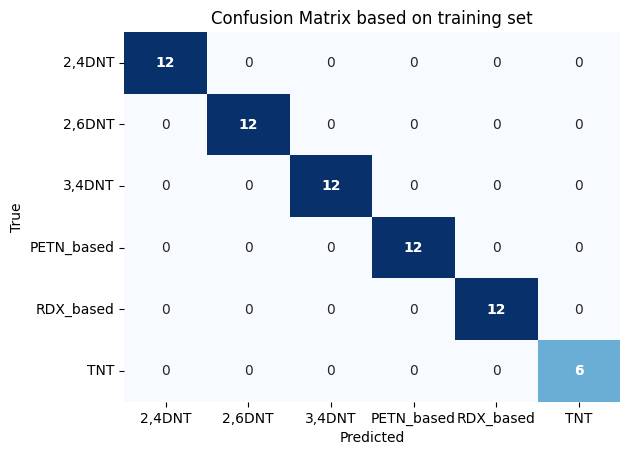

              precision    recall  f1-score   support

      2,4DNT       1.00      1.00      1.00        12
      2,6DNT       1.00      1.00      1.00        12
      3,4DNT       1.00      1.00      1.00        12
  PETN_based       1.00      1.00      1.00        12
   RDX_based       1.00      1.00      1.00        12
         TNT       1.00      1.00      1.00         6

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [85]:
# Assuming 'pred' and 'Y' are your predicted and true labels
conf_matrix = confusion_matrix(Y, pred)

# Get unique class labels from Y
class_labels = sorted(set(Y))

# Plot the confusion matrix using seaborn with custom colormap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False, vmin=0, vmax=conf_matrix.max())

# Highlight major diagonal (true positives) with the same color
for i in range(len(class_labels)):
    plt.text(i + 0.5, i + 0.5, conf_matrix[i, i], color='white', ha='center', va='center', fontweight='bold')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix based on training set')
plt.show()

# Print the classification report
print(classification_report(Y, pred, digits=2))

In [86]:
scores = pd.DataFrame(data = scores_lda, columns = ['LV1','LV2', 'LV3']) # latent variables
scores.index = data.index
scores

,LV1,LV2,LV3
Sample_id,,,
C4_7,2.260718,-0.839562,-0.251362
C4_8,2.725662,-2.052442,0.414664
C4_9,3.058746,-0.436403,-1.102512
C4_10,3.350188,-0.660047,1.412509
C4_11,3.339002,-0.315441,0.580266
...,...,...,...
"3,4DNT_8",-10.137240,-2.344044,1.169733
"3,4DNT_9",-10.971684,-2.660659,1.248901
"3,4DNT_10",-11.114910,-2.052584,1.511515


In [87]:
scores = pd.concat([scores, Y], axis = 1)
print(scores)

                 LV1       LV2       LV3      Class
Sample_id                                          
C4_7        2.260718 -0.839562 -0.251362  RDX_based
C4_8        2.725662 -2.052442  0.414664  RDX_based
C4_9        3.058746 -0.436403 -1.102512  RDX_based
C4_10       3.350188 -0.660047  1.412509  RDX_based
C4_11       3.339002 -0.315441  0.580266  RDX_based
...              ...       ...       ...        ...
3,4DNT_8  -10.137240 -2.344044  1.169733     3,4DNT
3,4DNT_9  -10.971684 -2.660659  1.248901     3,4DNT
3,4DNT_10 -11.114910 -2.052584  1.511515     3,4DNT
3,4DNT_11 -11.024393 -2.376808  1.487046     3,4DNT
3,4DNT_12  -9.127220 -1.213320  0.733369     3,4DNT

[66 rows x 4 columns]


In [88]:
print('explained variance ratio (first four components) with LDA: %s'
  % str(lda.explained_variance_ratio_))

explained variance ratio (first four components) with LDA: [0.58287915 0.29394936 0.1055803 ]


In [89]:
lda.explained_variance_ratio_

array([0.58287915, 0.29394936, 0.1055803 ])

In [90]:
# Extract loadings from LDA
loadings = pd.DataFrame(lda.coef_.T[:, :3], columns=['LV1', 'LV2', 'LV3'])

# Add the corresponding attribute names
loadings["Attributes"] = loadings_PCA.columns[:]
loadings

,LV1,LV2,LV3,Attributes
0,0.689309,-1.312012,-2.941409,PC1
1,1.580019,3.030533,-5.085159,PC2
2,-3.027238,-1.136332,5.076977,PC3
3,3.151084,-2.592309,-4.726549,PC4


In [91]:
#Scores plot
import plotly.express as px
fig = px.scatter(scores, x="LV1", y="LV2", color="Class", hover_data=['Class'])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_layout(
    height=600,
    width=800,
    title_text='Scores Plot')
fig.show()

In [92]:
# Plot 3D scores
fig = px.scatter_3d(scores, x='LV1', y='LV2', z='LV3',
                    color='Class', hover_data=['Class'], hover_name=scores.index)
fig.update_layout(
title_text='3D colored by Class for Linear Discriminant Analysis')
fig.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(array_representation, Y, train_size=0.7, shuffle=True, stratify=Y)

In [94]:
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [95]:
lda.predict(X_test)

array(['RDX_based', '3,4DNT', 'PETN_based', '2,4DNT', 'TNT', 'PETN_based',
       'RDX_based', '3,4DNT', '2,4DNT', '2,6DNT', 'PETN_based',
       'PETN_based', '2,4DNT', 'TNT', '2,6DNT', '3,4DNT', '2,4DNT',
       '2,6DNT', 'RDX_based', '2,6DNT'], dtype='<U10')

In [96]:
y_pred = lda.predict(X_test)
y_true = y_test

In [97]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

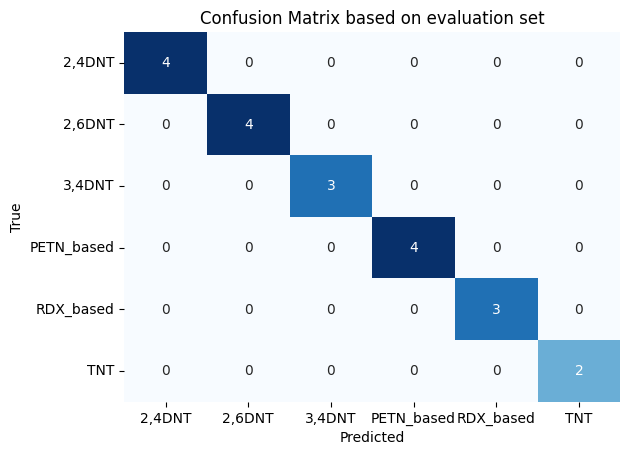

              precision    recall  f1-score   support

      2,4DNT       1.00      1.00      1.00         4
      2,6DNT       1.00      1.00      1.00         4
      3,4DNT       1.00      1.00      1.00         3
  PETN_based       1.00      1.00      1.00         4
   RDX_based       1.00      1.00      1.00         3
         TNT       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [98]:
# Assuming 'y_true' and 'y_pred' are your true and predicted labels
cm = confusion_matrix(y_true, y_pred)

# Get unique class labels from y_true
class_labels = sorted(set(y_true))

# Plot the confusion matrix using seaborn with custom colormap (Blues)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False, vmin=0, vmax=cm.max())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix based on evaluation set')
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred, digits=2))

In [99]:
pred_lda=lda.predict(X_test)
pred_lda

array(['RDX_based', '3,4DNT', 'PETN_based', '2,4DNT', 'TNT', 'PETN_based',
       'RDX_based', '3,4DNT', '2,4DNT', '2,6DNT', 'PETN_based',
       'PETN_based', '2,4DNT', 'TNT', '2,6DNT', '3,4DNT', '2,4DNT',
       '2,6DNT', 'RDX_based', '2,6DNT'], dtype='<U10')

In [100]:
print(classification_report(y_test, pred_lda, digits=3))

              precision    recall  f1-score   support

      2,4DNT      1.000     1.000     1.000         4
      2,6DNT      1.000     1.000     1.000         4
      3,4DNT      1.000     1.000     1.000         3
  PETN_based      1.000     1.000     1.000         4
   RDX_based      1.000     1.000     1.000         3
         TNT      1.000     1.000     1.000         2

    accuracy                          1.000        20
   macro avg      1.000     1.000     1.000        20
weighted avg      1.000     1.000     1.000        20

